# Рекомендация тарифов

## Откройте и изучите файл <a id="1"></a>

Загружаем библиотеки <a id="11"></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

Загрузка файла <a id="12"></a>

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

смотрим таблицу <a id="13"></a>

In [3]:
df.head(15)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


смотрим информацию по таблице <a id="14"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


приведение данных к нужным типам, что бы занимали меньше памяти <a id="15"></a>

In [7]:
df['calls'] = df['calls'].astype('int16')
df['minutes'] = df['minutes'].astype('float16')
df['messages'] = df['messages'].astype('int16')
df['mb_used'] = df['mb_used'].astype('float32')
df['is_ultra'] = df['is_ultra'].astype('int8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null int16
minutes     3214 non-null float16
messages    3214 non-null int16
mb_used     3214 non-null float32
is_ultra    3214 non-null int8
dtypes: float16(1), float32(1), int16(2), int8(1)
memory usage: 34.7 KB


In [9]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.0000,3214.000000,3214.000000,3214.000000
mean,63.038892,inf,38.281269,17207.673828,0.306472
std,33.236368,inf,36.148326,7570.968262,0.461100
min,0.000000,0.0000,0.000000,0.000000,0.000000
25%,40.000000,274.5625,9.000000,12491.902588,0.000000
50%,62.000000,430.6250,30.000000,16943.234375,0.000000
75%,82.000000,571.8750,57.000000,21424.699707,1.000000
max,244.000000,1632.0000,224.000000,49745.730469,1.000000


In [10]:
print(df['calls'].corr(df['minutes']))

0.9820855289609572


In [11]:
print(df['calls'].corr(df['messages']))

0.17738450121769536


In [12]:
print(df['calls'].corr(df['mb_used']))

0.2864415123384056


In [13]:
print(df['minutes'].corr(df['messages']))

0.17311973333524613


In [14]:
print(df['minutes'].corr(df['mb_used']))

0.2809742468737822


In [15]:
print(df['messages'].corr(df['mb_used']))

0.19572112199088632


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2651cdfdd0>,
      dtype=object)

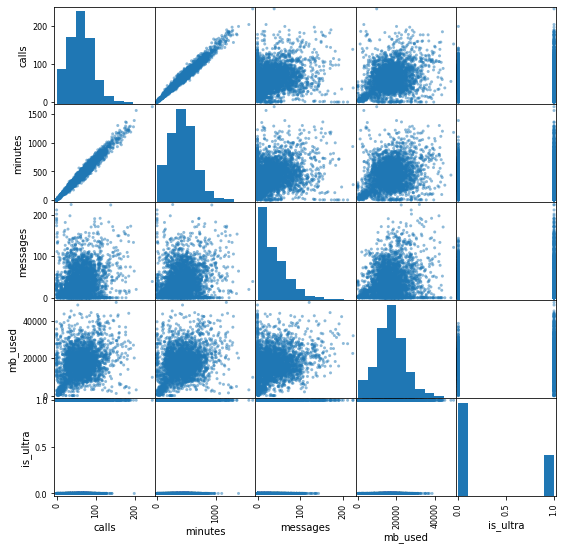

In [16]:
pd.plotting.scatter_matrix(df, figsize=(9, 9)) 

### Вывод <a id="16"></a>

получили информацию по таблице, пропусков нет, дубликатов нет, и привели данные к нужным типам, что бы они занимали меньше памяти

## Разбейте данные на выборки  <a id="2"></a>

Разделим исходные данные на обучающую, валидационную и тестовую выборки

In [17]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)


In [18]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)


(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


### Вывод  <a id="21"></a>

Разделили данные на три выборки, обучающую, валидационную и тестовую, на 20%, т.к. у нас малый объем данных

## Исследуйте модели <a id="3"></a>

проверка модели классификации деревом решений <a id="31></a>

In [19]:
best_result = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions)
    if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
    
print("Accuracy модели №", best_depth, ":", best_result)

Accuracy модели № 5 : 0.7947122861586314


проверка модели "Случайного леса" <a id="32"></a>

In [20]:
best_result1 = 0
for mx_depth in range(1, 10):
    for est in range(1, 30):
        model1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=mx_depth) 
        model1.fit(features_train, target_train) 
        result1 = model1.score(features_valid, target_valid) 
        if result1 > best_result1:
            best_model1 = model1
            best_result1 = result1
            best_est = est
            best_depth = mx_depth
        
print("Accuracy модели при числе деревьев", best_est, ',и глубине' ,best_depth, ':', best_result1)

Accuracy модели при числе деревьев 3 ,и глубине 7 : 0.8040435458786936


проверка модели логической регрессии <a id="33"></a>

In [21]:
model2 = LogisticRegression(random_state=123456)
model2.fit(features_train, target_train)
predictions2 = model2.predict(features_train) 
result2 = model2.score(features_valid, target_valid)
result2

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.702954898911353

### Вывод <a id="34"></a>

проверили три модели, самый высокий показатель у модели "случайного леса"

## Проверьте модель на тестовой выборке <a id="4"></a>

проверка модели на тестовой выборке дерево решений <a id="41">

In [22]:
features_upd = pd.concat([features_train, features_valid],ignore_index=True)
target_upd = pd.concat([target_train, target_valid], ignore_index=True)

model = DecisionTreeClassifier(random_state=12345, max_depth=5) 
model.fit(features_upd, target_upd)

predictions = model.predict(features_upd) 

model.fit(features_test, target_test)
test_predictions = model.predict(features_test)

result = accuracy_score(target_upd, predictions)
test_result = accuracy_score(target_test, test_predictions)

print('Accuracy объединенной выборки:', result)
print('Accuracy тестовой выборки:', test_result)

Accuracy объединенной выборки: 0.8261376896149358
Accuracy тестовой выборки: 0.833592534992224


проверка модели на тестовой выборке случайного леса <a id="42">

In [24]:
model1 = RandomForestClassifier(random_state=12345, n_estimators=3, max_depth=7) 
model1.fit(features_upd, target_upd) 
result1 = model1.score(features_valid, target_valid)
model1.fit(features_test, target_test)
test_result1 = model1.score(features_test, target_test)

print('Accuracy объединенной выборки:', result1)
print('Accuracy тестовой выборки:', test_result1)

Accuracy объединенной выборки: 0.8304821150855366
Accuracy тестовой выборки: 0.8553654743390358


проверка модели на тестовой выборке логической регрессии <a id="43">

In [25]:
model2 = LogisticRegression(random_state=123456)
model2.fit(features_upd, target_upd)  
result2 = model2.score(features_valid, target_valid)

model2.fit(features_test, target_test) 
test_result2 = model2.score(features_test, target_test)

print('Accuracy объединенной выборки:', result2)
print('Accuracy тестовой выборки:', test_result2)

Accuracy объединенной выборки: 0.6951788491446346
Accuracy тестовой выборки: 0.7107309486780715


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Вывод <a id="44"></a>

проверили модели на тестовой выборке лучший показатель также у модели случайный лес

## (бонус) Проверьте модели на адекватность <a id="5"></a>

In [27]:
target_test.value_counts(normalize=True)

0    0.688958
1    0.311042
Name: is_ultra, dtype: float64

In [28]:
target_tost = pd.Series([0]*len(target_test))

print(accuracy_score(target_test, target_tost))

0.6889580093312597


### 6.Общий вывод  <a id="6"></a>

получили информацию по таблице, пропусков нет, дубликатов нет, и привели данные к нужным типам, что бы они занимали меньше памяти. Разделили данные на три выборки, обучающую, валидационную и тестовую, на 20%, т.к. у нас малый объем данных. Обучили три модели, и проверили их на тестовой выборке, лучшей показатель у модели "Случайный лес", показатель составил 0,77